<h1><center>    
<strong>Postura vs Tipo de Personalidad</strong>
</h1></center>


### ➖ **Abstract**

**Introducción**<br>
La personalidad es una contrucción compleja de la naturaleza humana, incluyen varias clases de  caracteristicas y comportamientos que definen a un individuo, estos rasgos pueden ser infuenciados por diversos factores como socológicos, psicológicos, físicos entre otros.

El dataset usado en esta investigación recopila los resultados de los tipos de personalidad del test Myer Briggs junto con información sobre cuatro tipos de postura espinal. **El objetivo es determinar si existe alguna relación entre estos dos aspectos. "postura vs tipo de personalidad"**

**Audiencia**<br>
Esta investigación está dirigida a fisioterapeutas, quiroprácticos, especialista en la salud y seguridad en el trabajo con el fin de diseñar tratamientos o ejercicios específicos o personalizados para cada tipo de transtorno vertebral, considerando la influencia del tipo de personalidad del individuo.

**Participantes**<br>
Hombres, mujeres y niños entre los 10 a 80 años de edad.
<br><br>

### ➖ **Preguntas a resolver**

1. ¿Cómo está distribuido las edades?
2. ¿Qué relación guarda los tipos de personalidad frente a la salud de la espalda?
3. ¿Cómo influye el nivel de actividad física frente a las personalidades, edad, postura?

<br><br>

## **Definición de los Datos**

* age: Edad del participante.
* height: Altura en cm. del participante.
* weight: Peso en kg. del participante.
* activity_level: Nvel de actividad física (*bajo, moderado, alto*).
* pain_1: Dolor zona cervical escala 1-10 .
* pain_2: Dolor zona toráxica escala 1-10.
* pain_3: dolor zona lumbar escala 1-10.
* pain_4: dolor zona sacra escala 1-10.
* mbti: Tipo de personalidad mbti según test Myer Briggs.
* e: puntaje total de personalidad extrovertida según test Myer Briggs.
* i: puntaje total de personalidad introvertida según test Myer Briggs.
* s: puntaje total de personalidad sensorial según test Myer Briggs.
* n: puntaje total de personalidad intuitiva según test Myer Briggs.
* t: puntaje total de personalidad analítica test Myer Briggs.
* f: puntaje total de personalidad empatica test Myer Briggs.
* j: puntaje total de personalidad juzgadora test Myer Briggs.
* p: puntaje total de personalidad perceptiva test Myer Briggs.
* posture: postura de la espalda A: espalda sludable, B: lordosis-kyphosis, C: flat back, D: sway back.

<br>

## **Variables destacadas**

1. **Posture** será nuestra variable a predecir.
2. **mbti** 
3. **age**
4. **activity_level**

<br><br><br>

# ➖**Preparación de los Datos**

- Importar el conjunto de datos (archivo scv). 
- Inspección de las columnas y los datos en general, se espera que estos estén en el formato adecuado.
- Inspección de datos nulos, si los hay analizar el porqué existen estos mismos y si procedemos a eliminarlos o imputarlos.
- Inspección de valores duplicados, si los hay se procede a eliminarlos.

In [1]:
"""librerías necesarias para la preparación de los datos"""

import pandas as pd
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt

In [4]:
"""Importar el Dataset"""

df= pd.read_csv(r"./ProyectoDS_ParteIII_+Mogollón.csv", index_col=0)
df.sample(5) # el método sample toma un determinado numero de valores de manera aleatoria

binnedAge  age  height  weight     sex activity_level  pain_1  \
S No                                                                         
48    (10.929, 19.875]   13    1.57   57.61  Female            Low     3.0   
91     (28.75, 37.625]   29    1.65   56.70  Female       Moderate     2.0   
25      (46.5, 55.375]   50    1.52   53.52  Female       Moderate     7.0   
63     (19.875, 28.75]   21    1.57   53.52  Female            Low     7.5   
24     (64.25, 73.125]   71    1.55   63.50  Female            Low     8.0   

      pain_2  pain_3  pain_4  mbti   e   i   s   n   t   f   j   p posture  
S No                                                                        
48       2.0     2.0     5.0  ENFJ  21   0   7  17   2  21  13   9       B  
91       0.0     0.0     4.0  ENFP  19   2  13  13  12  12  10  12       A  
25       5.0     2.0     0.0  INFJ   2  19  11  15   1  23  12  10       C  
63       2.5     6.5     0.0  ESFP  11  10  19   7  10  14   5  17       B  
24       3.0     3.0     8.0  ESFJ  12   9  23   3   5  19  16   6       D

In [5]:
"""Inspección de tipos de datos y formato general de los mismos"""

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 1 to 97
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   binnedAge       97 non-null     object 
 1   age             97 non-null     int64  
 2   height          97 non-null     float64
 3   weight          97 non-null     float64
 4   sex             97 non-null     object 
 5   activity_level  97 non-null     object 
 6   pain_1          97 non-null     float64
 7   pain_2          97 non-null     float64
 8   pain_3          97 non-null     float64
 9   pain_4          97 non-null     float64
 10  mbti            97 non-null     object 
 11  e               97 non-null     int64  
 12  i               97 non-null     int64  
 13  s               97 non-null     int64  
 14  n               97 non-null     int64  
 15  t               97 non-null     int64  
 16  f               97 non-null     int64  
 17  j               97 non-null     int64

***Observaciones:***
- Aunque la columna binnedAge es de tipo numérica su Dtype es tipo object puesto que pertenece a un proceso de agrupación de edades para la creación de histogramas, esta columna se creó en entregas anteriores, para esta fase podemos precindir de ella.

In [6]:
del df['binnedAge']

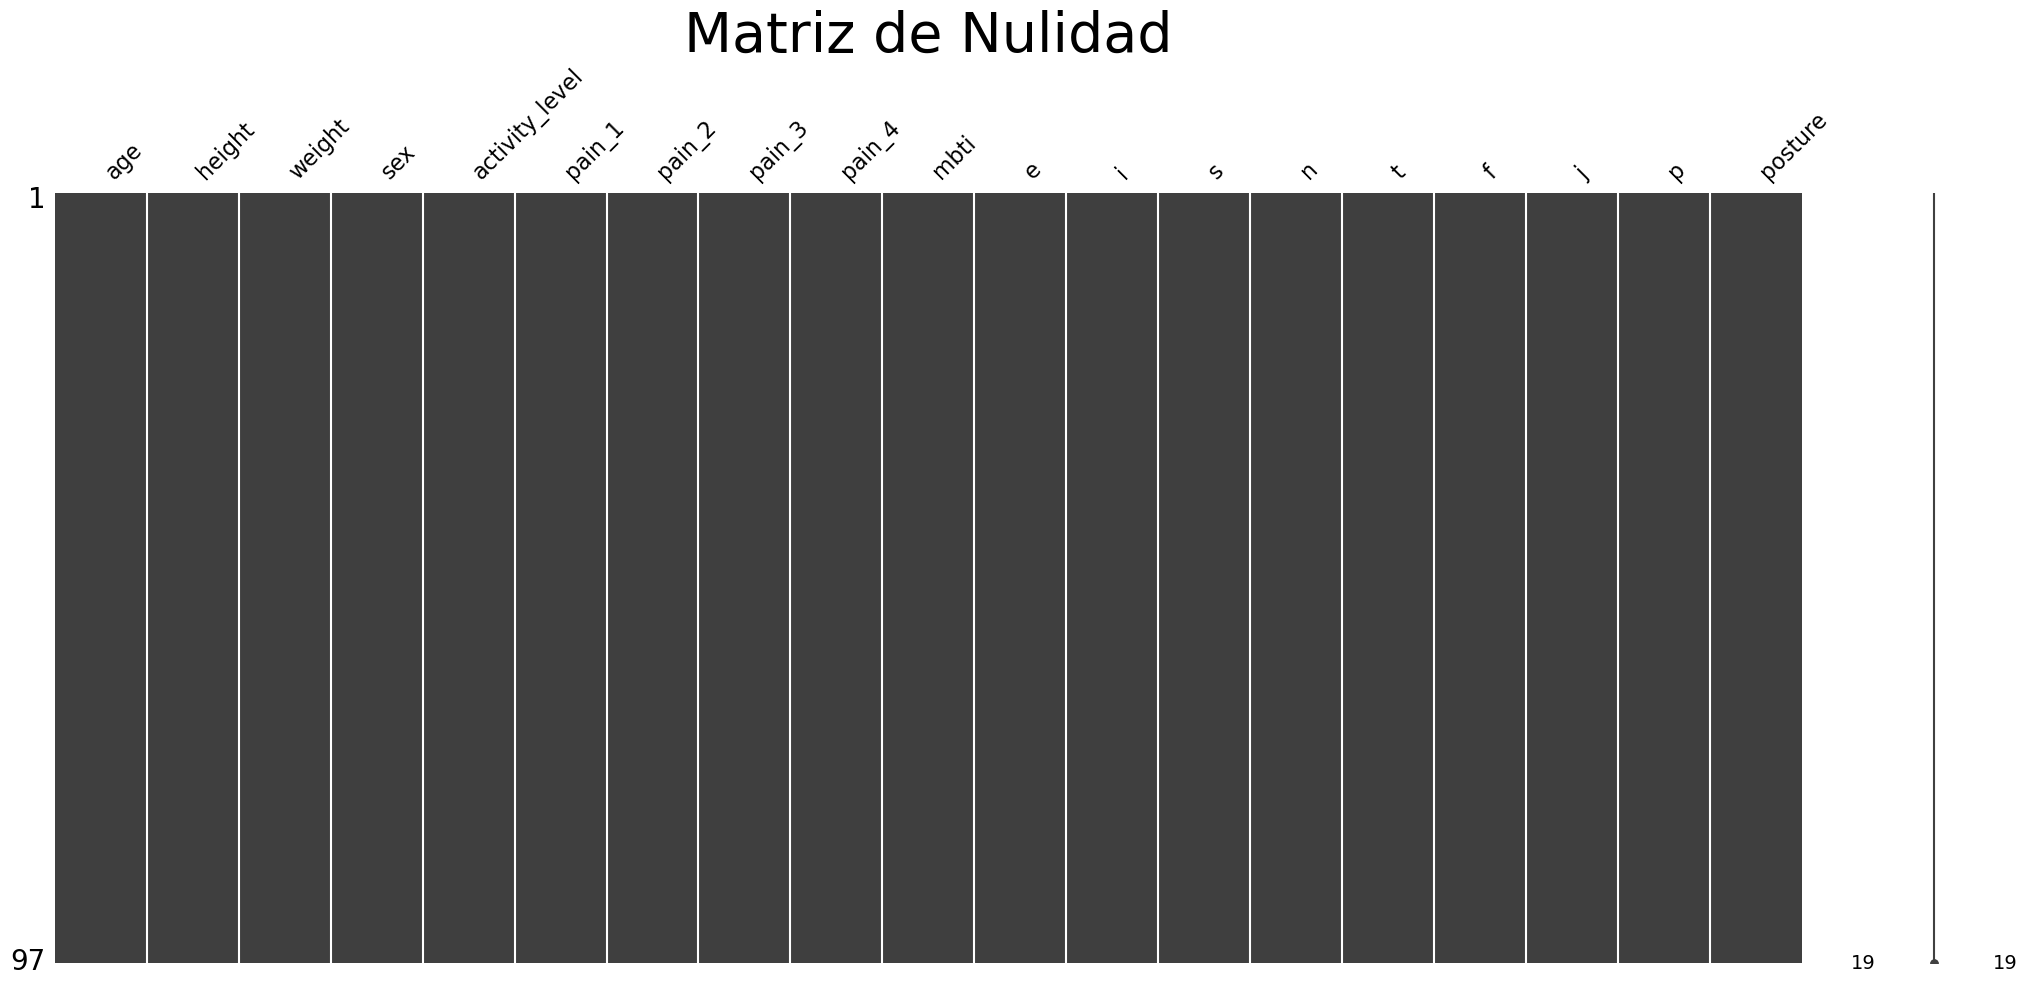

In [7]:
"""inspección de datos nulos"""


ax= msno.matrix(df,
                sparkline= True)

ax.set_title('Matriz de Nulidad', fontsize= 40)
plt.show()

***Observaciones:***
- Dataset `sin datos nulos`

In [8]:
"""Inspección de datos duplicados, si los hay se procede eliminar los registros (filas) repetidos"""

df[df.duplicated(keep=False)]

age  height  weight     sex activity_level  pain_1  pain_2  pain_3  \
S No                                                                       
88     28     1.7   81.65  Female            Low     0.0     0.0     0.0   
96     28     1.7   81.65  Female            Low     0.0     0.0     0.0   

      pain_4  mbti   e   i   s   n  t   f   j  p posture  
S No                                                      
88       0.0  ESFJ  11  10  22  14  8  16  14  8       B  
96       0.0  ESFJ  11  10  22  14  8  16  14  8       B

In [9]:
df= df.drop_duplicates()

<br><br><br>

# ➖**Análisis Exploratorio de datos EDA y Preprosesamiento de datos**


#### Análisis Univariado 

Conocer las distribuciones de:
+ Edad.
+ Tipos de postura.
+ Tipos de personalidad.
+ Nivel de actividad física.


#### Análisis Bivariado y Multivariado
+ Estado de salud en relación altura y peso (IMC).
+ Encontrar posibles relaciones entre estas variables

In [10]:
"""Importar librerías para visualización"""

import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import squarify

<br><br>

### **Análisis Univariado**
#### ***Distribución Edad***

- ¿Cómo estan distribuidas las edades de los encuestados?

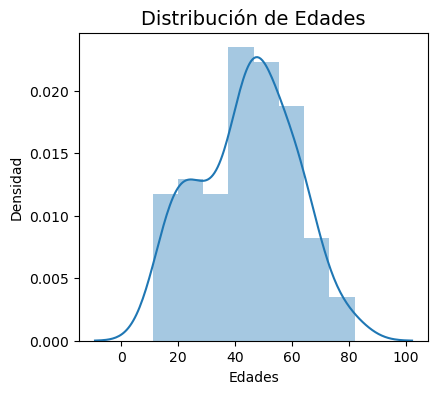

In [11]:
"""Histogrma de edades"""

fig, ax= plt.subplots(1, 1, figsize=(4.5,4))
sns.distplot(df['age'],
            bins= 8)

ax.set_title("Distribución de Edades", fontsize= 14, ha= 'center')
ax.set_ylabel("Densidad")
ax.set_xlabel("Edades")


plt.show()


In [12]:
"""Tabla de valores estadísticos Media y Promedio"""

pd.DataFrame({'Mediana': df['age'].median(),
              'Promedio': df['age'].mean().round(0)},
               index= ['Stats'])

Mediana  Promedio
Stats     45.0      44.0

**Observaciones**

- Los datos de las edades parecen tener una distribución mas o menos normal su curva de densidad se asemeja ligeramente a una campana de Gauss y la media y mediana son muy similares, por lo tanto` no hay sesgo importante en la selección de edades.`

In [14]:
"""Diagrama de bigotes"""

fig = px.box(
    df,
    y= 'age',
    width= 450,
    labels= {'age': 'Edad'}
    )

fig.update_layout(
    title= {'text': 'Distribución y Resumen Estadístico variable "age"',
            'x': 0.5,
            'y': 0.93,
            'xanchor': 'center'})

**Observaciones**

* El diagrama de bigotes muestra la mayor parte de los datos están en los rangos de $30$ - $56$ años, directamente no se observa `ningún valor atípico`.

* Clasificamos los rangos de edad en tres categorías que representan la edad en tres tipos de categorías. <br>
Creamos una nueva columna `etapa` que divide los datos en tres tipos de categorías

- `joven`: edades menores a $30$ años.
- `adulto`: edades entre $30$ a $60$ años.
- `adulto_mayor`: edades mayores a $60$.

In [15]:
df['etapa']= df['age'].apply(lambda x: 'joven' if x <= 29 else\
                                        'adulto' if 30 <= x <= 56 else\
                                        'adulto_mayor')

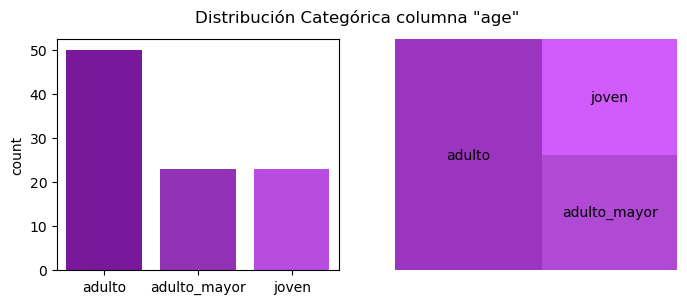

In [20]:
"""Distribución de la nueva columna etapa"""

fig, ax= plt.subplots(1, 2, figsize=(8, 3))

colores = sns.color_palette(['#8202B1', '#9C1DCB', '#C333F9'])

sns.countplot(data= df['etapa'],
              x= df['etapa'].values,
              order= df['etapa'].value_counts().index,
              ax= ax[0],
              palette= colores)

squarify.plot(sizes= df['etapa'].value_counts(),
              label= df['etapa'].value_counts().index,
              alpha= 0.8,
              ax= ax[1],
              color= colores)

ax[1].axis('off')
fig.suptitle('Distribución Categórica columna "age"', fontsize=12)
plt.show()


**Observaciones**

- Se observa que la mayoría de los datos se encuentran en las edates de $30$ a $60$ años de edad, `categóría adulto`.
- Las categorías `joven` y `adulto mayor` su distribución es equitativa.

<br><br>

#### ***Distribución Tipos de postura***

- ¿Cuál es el estado de salud de la columna vertebral?

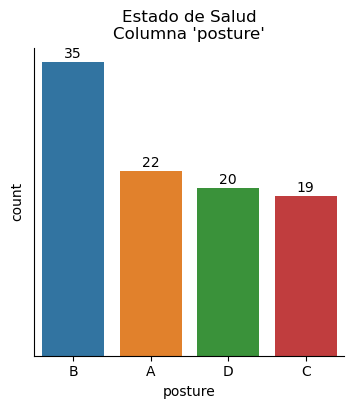

In [22]:
"""Gráfico de barras tipos de postura"""

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

counts = df['posture'].value_counts()
counts = counts.sort_values(ascending=False)

sns.countplot(data=df, x='posture', order=counts.index, ax=ax)

#for spine in ax.spines.values():
#    spine.set_edgecolor('w') Bucle rápido para eliminar todos los bordes del gráfico

for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center') # Este bucle permite colocar los valores de cada barra encima de ellas
    

ax = plt.gca()


ax.set_title("""Estado de Salud
Columna 'posture'""")
# Agregar o quitar lineas a los marcos de la gráfica
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_yticks([])
plt.show()


**Observaciones:**

De manera general:

- Más de un 50% de las personas evaluadas poseen trastornos vertebrales.

De mayor a menor vemos que: 

- La Postura más común es la tipo `B` (kyphosis-Losdosis)
- Seguido de la postura ideal tipo `A`.
- Las menos comunes son las tipo `D` (Sway Back- hiperlordosis)  y la tipo `C` (Flat Back).

<br><br>

#### ***Distribución Tipos de Personalidad***

Observemos la distribución de la columna `mbti` para saber cual o cuales pueden ser las personalidades más comunes de la muestra.

El gráfico de barras muestra todas las cateorías de la columna 'mbti' y su valores absolutos.

In [23]:
"""Gráfico de barras tipos de personalidad"""

px.bar(
    df['mbti'].value_counts().sort_values(ascending=False),
    y='mbti',
    color= 'mbti',
    labels= {'mbti':'Frecuencia', 'index': 'Personalidad Myer Briggs Test',},
    width= 800
    )


**Observaciones** 

* El grafico indica que la personalidad dominante es la de un `ESFP`, y la personalidad más baja es la de un `INTJ`.
* A lo largo del eje x se puede ver que todas las personalidades inician bien sea con `E (Extrovertido)` o con `I (Introvertido)`, resultaría más sencillo categorizar estas personalidads en dos grandes grupos.
* En general podemos graficar por diviciones de las 4 dicotomías del contexto MBTI y observar esta distribución.

In [24]:
df['energy_dichotomy']= df['mbti'].apply(lambda x: 'Introvert' if x[0]== 'I' else 'Extrovert')
df['perceiving_dichotomy']= df['mbti'].apply(lambda x: 'Sensory' if x[1]== 'S' else 'Intuitive')
df['take_decisions_dichotomy']= df['mbti'].apply(lambda x: 'Thinker' if x[2]== 'T' else 'Feeling')
df['qualifier_dichotomy']= df['mbti'].apply(lambda x: 'Judging' if x[3]== 'J' else 'Perceptive')

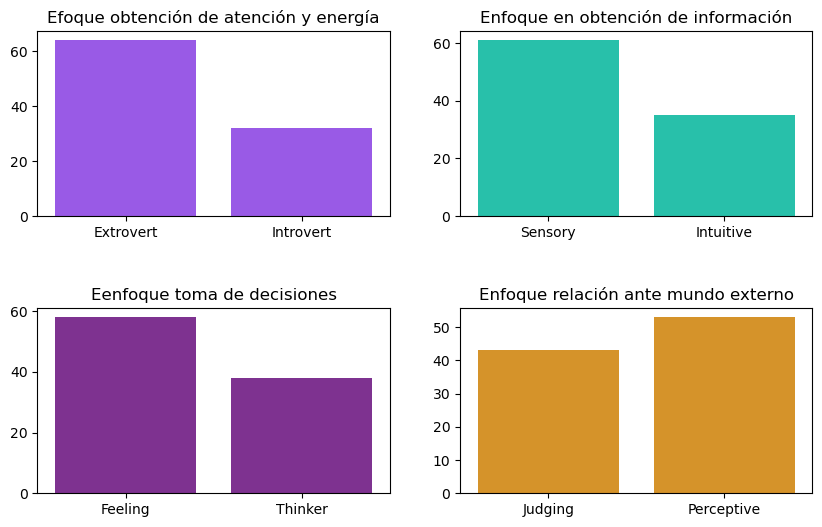

In [35]:
"""Gráfico de barras dicotomías de personalidad"""

lista_titulos=['Efoque obtención de atención y energía','Enfoque en obtención de información','Eenfoque toma de decisiones','Enfoque relación ante mundo externo']
colores = ['#9743FD', '#0FD9BC', '#8822A0', '#F2990D']
plt.figure(figsize= (10,6))
for i, col in enumerate(df.iloc[:, -4:]):
    ax = plt.subplot(2,2, i+1)
    sns.countplot(x=df[col], ax=ax, color=colores[i])
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(lista_titulos[i], fontsize= 12)
    
    
plt.subplots_adjust(hspace=0.5)
plt.show()


**Observaciones**

En relación a ambas gráficas:

- Hay una disparidad notable entre los `extrovertidos` e introvertidos. del mismo modo hay más personalidaes `sensoriales` que intuitivaa y `sentimentales` que pensadoras.
- las personalidaes jusgadoras y perceptivas su distribución es más pareja.

<br><br>

#### ***Distribución Nivel de actividad Física***

graficamos la característica de actividad física ya que es una medida que permite evaluart el estado de salud de las personas.

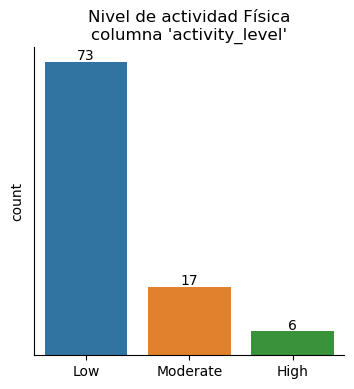

In [39]:
"""Gráfico de barras nivel de actividad física"""

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

counts = df['activity_level'].value_counts()
counts = counts.sort_values(ascending=False)

sns.countplot(data=df,
              x='activity_level',
              order=counts.index,
              ax=ax,)

#for spine in ax.spines.values():
#    spine.set_edgecolor('w') Bucle rápido para eliminar todos los bordes del gráfico

for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center') # Este bucle permite colocar los valores de cada barra encima de ellas
    

ax = plt.gca()


ax.set_title("""Nivel de actividad Física
columna 'activity_level'""")
# Agregar o quitar lineas a los marcos de la gráfica
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_yticks([])
ax.set_xlabel('')
plt.show()

**Observaciones:**

- Los encuestados `poseen un estilo de vida sedentario` es posible que `trabajen la mayor parte del tiempo frente a un computador` o `poseen un nivel de dolor corporal elevado` esto último se puede saber al realizar gráficas correspondientes al nivel de dolor de las columnas etiquetadas como `pain`, `height` y `weight`.


<br><br>

#### ***Distribución Nivel de dolor espinal***

Dando concepto a las definiciones de las columnas `pain`

* pain_1: Dolor zona cervical escala 1-10 .
* pain_2: Dolor zona toráxica escala 1-10.
* pain_3: dolor zona lumbar escala 1-10.
* pain_4: dolor zona sacra escala 1-10.

graficamos la característica de actividad física ya que es una medida que permite evaluar el estado de salud de las personas, de manera tal que podamos hacer aseveraciones del porqué la mayoría de los encuestados no realizan actividad física.

In [51]:
fig= px.box(df.rename(columns={'pain_1': 'Cervical', 'pain_2': 'Toráxico', 'pain_3': 'Lumbar', 'pain_4': 'Sacra'}),
            y=['Cervical', 'Toráxico', 'Lumbar', 'Sacra'],
            labels={'variable': ''}
            )

fig.update_layout(
    title= {'text': 'Distribución y Resumen Estadístico columnas "pain"',
            'x': 0.5,
            'y': 0.93,
            'xanchor': 'center'})

fig.show()

**Observaciones:**

* Los valores que van desde el cuartil 2 hacia los valores altos en todas las gráficas demuestran que los encuastados poseen niveles de dolor elevado en alguna de las cuatro zonas del dataset lo cual es una razón obvia por la que muchos no realizan actividad física.

<br><br>

#### ***Distribución Peso Altura***

Podemos relacionar estas dos variables con el índice de masa corporal, categorizarla y observar el peso de una persona esta dentro de un rango normal o posee obesidad o sobrepeso. 

In [40]:
df['imc']= df['weight']/(df['height'])**2

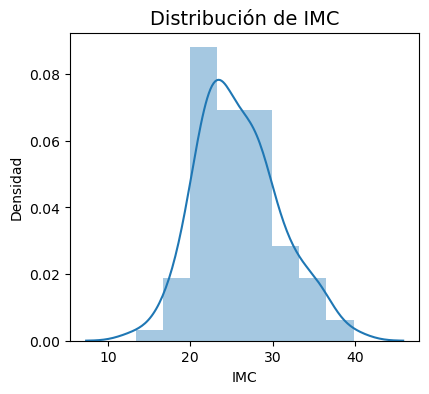

In [52]:
"""Histogrma de índice IMC"""

fig, ax= plt.subplots(1, 1, figsize=(4.5,4))
sns.distplot(df['imc'],
            bins= 8)

ax.set_title("Distribución de IMC", fontsize= 14, ha= 'center')
ax.set_ylabel("Densidad")
ax.set_xlabel("IMC")


plt.show()

**Observaciones:**

- Se muestra las frecuencias para 8 rangos diferentes de IMC desde la delgadez muy severa (IMC= 10 - 15) hasta la obesidad mórbida (IMC= 35 o más).
-El dataset muestra que son muy pocos los encuestados que están en los máximos extremos mensionados y que el grueso posee un peso saludable y algo de sobrepeso.



<br><br>

### **Bivariado y Multivariado**
#### ***Relación Postura y tipo de Personalidad E/I***

- Con los gráficos anteriores nos dimos cuenta que la columna mbti se pueda categorizar en dos grandes grupos, los introvertidos y los extrovertidos 
¿Como está relacionado la postura fente a estas dos grandes personalidades?

In [487]:
px.histogram(
    df.rename(columns={'energy_dichotomy':'Introvertido / Extrovertido'}),
    x= 'posture',
    color= 'Introvertido / Extrovertido',
    barmode= 'group',
    category_orders= {'posture': ['A', 'B', 'C', 'D']},
    width= 550,
    height= 350
    
)

**Observaciones:**

- Los `extrovertidos` poseen `posturas más sanas` al mismo tiempo ellos poseen mayor transtorno `tipo B.`
- Los introvertidos poseen transtornos tipo `C` y `D`.

<br><br>

### **Análisis Multivariado**

Realizamos graficas de sispersión para intentar ver tendencias, agrupaciones o correlaciones entre las 4 dicotomias de la personalidad `mbti`, el `IMC` infiriendo que un desorden en el peso de la persona influya en la `personalidad` y `postura` de la misma y la diferencia de `edad`

#### ***Relación Postura, dicotomía I/E, IMC, etapa de edad***

- con estas variables, ¿podemos encontrar algun patrón para identificar un tipo de postura? 

In [59]:
px.scatter(df.rename(columns={'energy_dichotomy':'I / E'}),
           x= 'age',
           y= 'imc',
           color= 'posture',
           facet_col= 'etapa',
           facet_row= 'I / E',
           labels={'age': 'Edad', 'imc': 'IMC'},
           category_orders= {'etapa': ['joven', 'adulto', 'adulto_mayor']})


**Observaciones:**
- Las posturas más sanas `tipo A` las poseen personalidades `Extrovertidas`
- Las posturas `tipo C` son más propensas en los `Introvertidos`
- En la categoría `adulto`,  `extrovertido` es muy probable encontrar oersonas con posturas más sanada `tipo A`.
- Un `adulto mayor`, `introvertido` y con `IMC` entre $22$ - $29$ tienden a tener posturas `tipo D`.
- Los `jóvenes` extrovertidos tienen altas probabilidaes de tener postura `tipo B`

#### ***Relación Postura, dicotomía S/N, IMC, etapa de edad***

- con estas variables, ¿podemos encontrar algun patrón para identificar un tipo de postura? 

In [516]:
px.scatter(df.rename(columns={'perceiving_dichotomy':'S / N'}),
           x= 'age',
           y= 'imc',
           color= 'posture',
           facet_col= 'etapa',
           facet_row= 'S / N',
           labels={'age': 'Edad', 'imc': 'IMC'},
           category_orders= {'etapa': ['joven', 'adulto', 'adulto_mayor']})

**Observaciones:**
- Con `IMC` superior a 20 se encuentran las posturas más sanas `tipo A` y es más probable que estas posturas las tenga personalidades `Sensoriales`.
- Es más probable encontrar `jóvenes` con postura `tipo B` y de actitud `sensorial`.
- Es poco probable que una personalidad `intuitiva` sufra de trastorno `tipo C`.
- `Edades superiores` a $40$ años con `IMC` superioes a $20$ son más propensos a poseer trastornos `tipo D`

#### ***Relación Postura, dicotomía T/F, IMC, etapa de edad***

- con estas variables, ¿podemos encontrar algun patrón para identificar un tipo de postura? 

In [518]:
px.scatter(df.rename(columns={'take_decisions_dichotomy':'T / F'}),
           x= 'age',
           y= 'imc',
           color= 'posture',
           facet_col= 'etapa',
           facet_row= 'T / F',
           labels={'age': 'Edad', 'imc': 'IMC'},
           category_orders= {'etapa': ['joven', 'adulto', 'adulto_mayor']})

**Observaciones:**
- Los `adultos` con `IMC` superior a $20$ tienden a poseer postura más sanas `Tipo A`.
- una postura `tipo B` es mas frecuente en personas `analíticas T`.
- una postura `tipo C` es mas frecuente en personas `empáticas F`.
- Los `adultos mayores` nuevamente demuestran tener posturas `tipo D`.

#### ***Relación Postura, dicotomía J/P, IMC, etapa de edad***

- con estas variables, ¿podemos encontrar algun patrón para identificar un tipo de postura? 

In [519]:
px.scatter(df.rename(columns={'qualifier_dichotomy':'J / P'}),
           x= 'age',
           y= 'imc',
           color= 'posture',
           facet_col= 'etapa',
           facet_row= 'J / P',
           labels={'age': 'Edad', 'imc': 'IMC'},
           category_orders= {'etapa': ['joven', 'adulto', 'adulto_mayor']})

**Observaciones:**
- Para una persona joven es más probable encontrar posturas `tipo B` y muy poco probable que existan y poco posible posturas tipo `C` y `D`.
- Los `adultos` poseen posturas más sanas `tipo A` independientemente de su personalidad.
- Para una persona `adulta` es probable tambien encontrar posturas `tipo C`.
- Para un `adulto mayor` es más probable que sufran transtornos `tipo D` y poco probable que a su edad posean una postura `Tipo A`.


In [62]:
px.histogram(
    df,
    x= 'mbti',
    color= 'posture',
    barmode= 'group'
)

**Observaciones:**
- Es muy probable encontrar una postura `tipo A` en personalidades como `ESTP` o `ENFP`.
- Es muy probable encontrar una postura `tipo B` en personalidades como `ESFJ`, `ESTP` o `ESFP`.
- Es muy Probable encontrar una postura `tipo C` en personalidades como `INTJ` o `ISFJ`.
- Es muy Probable encontrar una postura `tipo D` en personalidades como `INFP` o `ISFP`.

<br><br><br>

# ➖**Selección de Características**

In [82]:
"""Creamos una copia del df original para transfrormas los datos categóricos"""

dfCopy= df.copy()
dfCopy

age  height  weight     sex activity_level  pain_1  pain_2  pain_3  \
S No                                                                       
1      53    1.57   56.70  Female            Low     0.0     0.0     0.0   
2      52    1.75   71.21    Male           High     7.0     8.0     5.0   
3      30    1.75   90.72    Male           High     0.0     0.0     0.0   
4      51    1.68   79.38    Male       Moderate     9.5     9.5     9.5   
5      45    1.60   90.26  Female       Moderate     4.0     5.0     2.0   
...   ...     ...     ...     ...            ...     ...     ...     ...   
92     16    1.75   58.97  Female       Moderate     5.0     0.0     5.0   
93     16    1.47   45.36    Male       Moderate     0.0     0.0     0.0   
94     45    1.57   60.78  Female       Moderate     0.0     4.0     0.0   
95     43    1.75   85.28    Male       Moderate     2.0     0.0     0.0   
97     43    1.75   85.28    Male       Moderate     4.0     0.0     0.0   

      pain_4  mbti  ...   f   j   p  posture   etapa  energy_dichotomy  \
S No                ...                                                  
1        0.0  ESFJ  ...  13  18   4        A  adulto         Extrovert   
2        3.0  ISTJ  ...   3  13   9        B  adulto         Introvert   
3        0.0  ESTJ  ...   9  12  10        A  adulto         Extrovert   
4        1.5  ISTJ  ...  11  19   3        D  adulto         Introvert   
5        2.0  ENFJ  ...  15  16   6        A  adulto         Extrovert   
...      ...   ...  ...  ..  ..  ..      ...     ...               ...   
92       7.0  ENFJ  ...  22  12  10        B   joven         Extrovert   
93       3.0  ESTP  ...   5   2  20        B   joven         Extrovert   
94       0.0  ESFJ  ...  18  13   9        B  adulto         Extrovert   
95       0.0  ENFP  ...  18   2  20        A  adulto         Extrovert   
97       0.0  ENFP  ...  18   2  20        A  adulto         Extrovert   

      perceiving_dichotomy  take_decisions_dichotomy qualifier_dichotomy  \
S No                                                                       
1                  Sensory                   Feeling             Judging   
2                  Sensory                   Thinker             Judging   
3                  Sensory                   Thinker             Judging   
4                  Sensory                   Thinker             Judging   
5                Intuitive                   Feeling             Judging   
...                    ...                       ...                 ...   
92               Intuitive                   Feeling             Judging   
93                 Sensory                   Thinker          Perceptive   
94                 Sensory                   Feeling             Judging   
95               Intuitive                   Feeling          Perceptive   
97               Intuitive                   Feeling          Perceptive   

            imc  
S No             
1     23.002962  
2     23.252245  
3     29.622857  
4     28.125000  
5     35.257812  
...         ...  
92    19.255510  
93    20.991254  
94    24.658201  
95    27.846531  
97    27.846531  

[96 rows x 25 columns]

## **Feature Engineering**

Hemos realizado un par de transformaciones a lo largo de los desafíos con el objeto de entender o clasificar mejor la información de los datos, sin embargo para crear modelos es conveniente realizar otro tipo de feaure engineering que le facilite a los modelos de ML su predicción realizaremos one-hot encodig y label - coder para ciertas columnas.

|One-Hot Encoding |Label Encoding |
|-----------------|---------------|
|columna *`sex`*|columna *`etapa`*|
|columna *`energy_dichotomy`*|columna *`posture`*|
|columna *`perceiving_dichotomy`*|columna *`activity_level`*|
|columna *`take_decisions_dichotomy`*|
|columna *`qualifier_dichotomy`*|
|columna *`mbti`*|


In [83]:
# Importamos librerías necesarias para hacer Featurin Engineering
import sklearn
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()

In [84]:
# Obtenemos las variables dummies

dfCopy= dfCopy.join(pd.get_dummies(dfCopy['sex']))
dfCopy= dfCopy.join(pd.get_dummies(dfCopy['energy_dichotomy']))
dfCopy= dfCopy.join(pd.get_dummies(dfCopy['perceiving_dichotomy']))
dfCopy= dfCopy.join(pd.get_dummies(dfCopy['take_decisions_dichotomy']))
dfCopy= dfCopy.join(pd.get_dummies(dfCopy['qualifier_dichotomy']))
dfCopy= dfCopy.join(pd.get_dummies(dfCopy['mbti']))


In [85]:
# Obtenemos las variables label encoder

mapeo_al= {'Low': 0, 'Moderate': 1, 'High': 2,}
dfCopy['activity_level']= [mapeo_al[x] for x in dfCopy['activity_level']]

dfCopy['posture']= lbl_encode.fit_transform(dfCopy['posture'])

mapeo_etapa= {'joven': 0, 'adulto': 1, 'adulto_mayor': 2}
dfCopy['etapa']= [mapeo_etapa[x] for x in dfCopy['etapa']]

Luego de obtener las variables categóricas a un formato numérico podemos eliminar las variables que no sean numéricas.

In [86]:
dfCopy['imc']= dfCopy['imc'].round(1)

In [87]:
dfCopy= dfCopy.select_dtypes(include= [np.number])

In [88]:
corrrelation= dfCopy.corr()
corrrelation

age    height    weight  activity_level    pain_1  \
age             1.000000 -0.019785  0.280168       -0.283780  0.019149   
height         -0.019785  1.000000  0.555543        0.166155 -0.144649   
weight          0.280168  0.555543  1.000000       -0.028038 -0.059342   
activity_level -0.283780  0.166155 -0.028038        1.000000  0.019759   
pain_1          0.019149 -0.144649 -0.059342        0.019759  1.000000   
pain_2          0.022338  0.152276  0.116990        0.009605  0.196032   
pain_3         -0.036855  0.101719  0.117702       -0.072749  0.497408   
pain_4          0.231363 -0.070640  0.223592       -0.177751  0.301269   
e              -0.146533 -0.066467  0.098696        0.086358 -0.186634   
i               0.151786  0.062821 -0.098428       -0.084768  0.191831   
s               0.204791 -0.193086 -0.075084       -0.206018  0.024245   
n              -0.221938  0.209636  0.094442        0.200582 -0.042735   
t               0.118752  0.285078  0.234292        0.008753 -0.040232   
f              -0.118012 -0.277055 -0.226287       -0.003680  0.041125   
j               0.047534  0.146648 -0.001159       -0.075978  0.136985   
p              -0.049313 -0.146687 -0.000456        0.076197 -0.132388   
posture         0.133256  0.040774 -0.147661       -0.224627 -0.023024   
etapa           0.920178  0.029955  0.267737       -0.233705  0.032289   
imc             0.364356  0.092286  0.873282       -0.140236  0.003700   
Female         -0.042423 -0.547853 -0.516294       -0.269625  0.201160   
Male            0.042423  0.547853  0.516294        0.269625 -0.201160   
Extrovert      -0.078523 -0.003858  0.118664        0.063551 -0.084770   
Introvert       0.078523  0.003858 -0.118664       -0.063551  0.084770   
Intuitive      -0.232959  0.045585 -0.006982        0.202679 -0.026605   
Sensory         0.232959 -0.045585  0.006982       -0.202679  0.026605   
Feeling        -0.097220 -0.188667 -0.235610       -0.055901  0.046830   
Thinker         0.097220  0.188667  0.235610        0.055901 -0.046830   
Judging         0.007658  0.035708 -0.090664        0.036523  0.114878   
Perceptive     -0.007658 -0.035708  0.090664       -0.036523 -0.114878   
ENFJ           -0.154717  0.028140  0.025826        0.201401  0.058393   
ENFP           -0.029017 -0.062669 -0.002043        0.234144  0.005127   
ENTJ           -0.109794  0.131284  0.031003       -0.122189 -0.097068   
ENTP            0.053054 -0.006242  0.229509       -0.041291 -0.033054   
ESFJ            0.071054 -0.094822 -0.046400       -0.118911  0.058340   
ESFP           -0.077813 -0.080023 -0.049335       -0.142672  0.025344   
ESTJ            0.189209  0.000087  0.046000        0.061213 -0.048926   
ESTP           -0.086200  0.126678  0.037549        0.057617 -0.127905   
INFJ           -0.097043  0.003186 -0.131103       -0.018740  0.027540   
INFP           -0.109794 -0.060270 -0.175283       -0.041291 -0.014765   
INTJ           -0.123021  0.195050 -0.011957        0.300604 -0.006463   
ISFJ           -0.036793 -0.075005 -0.097454       -0.122189  0.003525   
ISFP            0.198807  0.021075 -0.011712       -0.077057 -0.080186   
ISTJ            0.131120  0.030996 -0.026574        0.088182  0.227169   
ISTP            0.090279 -0.007737  0.207939       -0.108694  0.017371   

                  pain_2    pain_3    pain_4         e         i  ...  \
age             0.022338 -0.036855  0.231363 -0.146533  0.151786  ...   
height          0.152276  0.101719 -0.070640 -0.066467  0.062821  ...   
weight          0.116990  0.117702  0.223592  0.098696 -0.098428  ...   
activity_level  0.009605 -0.072749 -0.177751  0.086358 -0.084768  ...   
pain_1          0.196032  0.497408  0.301269 -0.186634  0.191831  ...   
pain_2          1.000000  0.373726  0.104116 -0.125125  0.127070  ...   
pain_3          0.373726  1.000000  0.293544 -0.116919  0.117296  ...   
pain_4          0.104116  0.293544  1.000000  0.155537 -0.154860  ...   
e              -0.125125 -0.11691

In [103]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score # para evaluar la calidad del modelo de regresión
import statsmodels.api as sm # para usarlo en caso de ajustar un modelo de regresión linal múltiple
import sys # paraacceder a algunas variables y funciones específica de python
import joblib # para almacenar y cargar modelos de aprendizaje automático
import warnings 
warnings.filterwarnings("ignore")

from mlxtend.feature_selection import SequentialFeatureSelector as SFS # ayuda a seleccionar un las mejore columnas
sys.modules["sklearn.externals.joblib"] = joblib

Dividimos los 4 conjuntos del dataset 2 de prueba y dos de entrenamiento

In [136]:
X= dfCopy.loc[:, dfCopy.columns != 'posture']
y= dfCopy['posture']

In [158]:
X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y,
                                                   test_size=0.2, #separa 80% entrena y 20% evalua
                                                   random_state= 42 # semilla en 2 cada vez que se ejecute el códifo los datos de entrenamiento y prueba serán reproducibles.
                                                   )

In [138]:
sfs1= SFS(LinearRegression(),# usamos la función sequential feature selector
    k_features= 5, # 5 columnas óptimas
    forward= True, # selección tipo forward
    floating= False, # si se añadió una característica no la va a eliminar
    scoring= 'r2', # coeficiente de determinación de rendimiento
    cv= 10 # ideal 10 hacia arriba 10 particiones de validación cruzada
)

sfs1.fit(X_train, y_train) # se ajusta el algoritmo a los dtos de entramiento 
df1= dfCopy[list(sfs1.k_feature_names_)]# se crea un nuevo df con sólo las columnas seleccionadas 
df1

activity_level  Introvert  ENFP  INFP  ISFP
S No                                             
1                  0          0     0     0     0
2                  2          1     0     0     0
3                  2          0     0     0     0
4                  1          1     0     0     0
5                  1          0     0     0     0
...              ...        ...   ...   ...   ...
92                 1          0     0     0     0
93                 1          0     0     0     0
94                 1          0     0     0     0
95                 1          0     1     0     0
97                 1          0     1     0     0

[96 rows x 5 columns]

<br><br><br>

# **Regresión Logística Multinomial**

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [140]:
X_train.columns

Index(['age', 'height', 'weight', 'activity_level', 'pain_1', 'pain_2',
       'pain_3', 'pain_4', 'e', 'i', 's', 'n', 't', 'f', 'j', 'p', 'etapa',
       'imc', 'Female', 'Male', 'Extrovert', 'Introvert', 'Intuitive',
       'Sensory', 'Feeling', 'Thinker', 'Judging', 'Perceptive', 'ENFJ',
       'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP',
       'INTJ', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype='object')

In [179]:
## Selector de características

selector= SelectKBest(chi2, k=11)
X_train_seleccionado= selector.fit_transform(X_train, y_train)
X_test_seleccionado= selector.transform(X_test)

In [180]:
X_train.columns[selector.get_support()]# Muestra cuales fueron las mejores columnas para aplicar al modelo

Index(['age', 'pain_2', 'pain_3', 'e', 'i', 'j', 'p', 'Extrovert', 'Introvert',
       'ENFP', 'ISFP'],
      dtype='object')

In [181]:
# Creando el modelo de regresión logística multinomial

log_reg= LogisticRegression(
    multi_class= 'multinomial',
    solver= 'lbfgs'
)

In [182]:
# Entrenar el modelo con las características seleccionadas

log_reg.fit(X_train_seleccionado, y_train)

LogisticRegression(multi_class='multinomial')

In [183]:
# Predecir con los datos de prueba
y_prediccion= log_reg.predict(X_test_seleccionado)

In [184]:
# Evaluar el rendimiento del modelo

puntaje= log_reg.score(X_test_seleccionado, y_test)
puntaje

0.35

**Observaciones:**
- Obtuvimos un accuracy del 32% bajo este modelo, observemos que otro tipo de modelo de Machine Learnin podemos aplicar.

<br><br><br>

# **Naive Bayes**



In [194]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score

In [200]:
# Seleccionando las mejores columnas
selector= SelectKBest(chi2, k= 6)
X_train_seleccionado= selector.fit_transform(X_train, y_train)
X_test_seleccionado= selector.transform(X_test)

In [201]:
# Entrenamiento del modelo
gnb= GaussianNB()
gnb.fit(X_train_seleccionado, y_train)

GaussianNB()

In [202]:
# Predicción del conjunto de prueba

y_prediccion= gnb.predict(X_test_seleccionado)

In [206]:
# Evaluar el rendimiento del modelo

puntaje= accuracy_score(y_test, y_prediccion)
puntaje

0.5

**Observaciones:**
- Con este modelo estamos prediciendo la mitad de los casos pero en terminos generales no es preciso

<br><br><br>
# **Support Vector Machines (SVM)**

In [210]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report

In [224]:
# Selección de características

selector= SelectKBest(chi2, k= 8)
X_train_seleccionado= selector.fit_transform(X_train, y_train)
X_test_seleccionado= selector.transform(X_test)

In [225]:
svm= SVC(kernel= 'linear')
svm.fit(X_train_seleccionado, y_train)

SVC(kernel='linear')

In [227]:
# Predicción  y evaluación

y_pred= svm.predict(X_test_seleccionado)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5

    accuracy                           0.20        20
   macro avg       0.12      0.12      0.12        20
weighted avg       0.20      0.20      0.20        20



In [228]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.2

**Observaciones:**
- Con este modelo obtenemos una precisión del 20%

# **Redes Neuronales Artificiales**


In [222]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score

In [240]:
# Selección de características

selector= SelectKBest(chi2, k= 6)
X_train_seleccionado= selector.fit_transform(X_train, y_train)
X_test_seleccionado= selector.transform(X_test)

In [244]:
# Construcción del modelo

modelo = Sequential()
modelo.add(Dense(12, input_dim= 6, activation= 'relu'))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [245]:
# Compilación del modelo

modelo.compile(loss='binary_crossentropy',
               optimizer= 'adam',
               metrics= ['accuracy'])

In [246]:
# Entrenamiento del modelo
modelo.fit(X_train_seleccionado, y_train, epochs= 150, batch_size=10, verbose=0)

In [249]:
# Evaluación del modelo

y_prediccion= modelo.predict(X_test_seleccionado)
#y_prediccion= [1 if x > 0.5 else 0 for x in y_prediccion]
accuracy= accuracy_score(y_test, y_prediccion)
accuracy

1/1 [==============================] - 0s 26ms/step


0.2

In [252]:
_, accuracy = modelo.evaluate(X_test_seleccionado, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 20.00


In [265]:
selector= SelectFromModel(RandomForestClassifier(n_estimators= 100))
selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [266]:
selected_feat= X_train.columns[(selector.get_support())]
X_train_seleccionado= X_train[selected_feat]
X_test_seleccionado= X_test[selected_feat]

In [267]:
modelo= RandomForestClassifier(n_estimators= 100)
modelo.fit(X_train_seleccionado, y_train)

RandomForestClassifier()

In [268]:
y_prediccion= modelo.predict(X_test_seleccionado)

In [269]:
accuracy= accuracy_score(y_test, y_prediccion)
accuracy

0.45

<h1><center>
4. Conclusiones </h1></center>

* Con el modelo que mejor desempeño obtuvimos es el de Naive Bayes con un 50% de precisión.
* Es necesario solicitar más información obtener un dataset más nutritivo de manera que podamos obtener resultados más precisos.